# Notebook imports and packages 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import sympy as sp
import math

%matplotlib inline

$f(x) = x^2 + x + 1$

In [4]:
def f(x):
    return x**2 + x + 1

In [5]:
X = np.linspace(start=-3, stop=3, num=100)

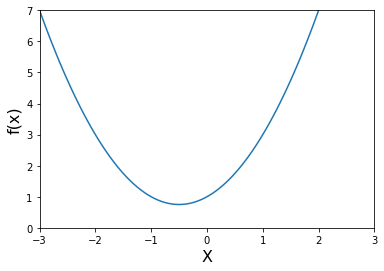

In [6]:
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.xlim([-3, 3])
plt.ylim([0, 7])
plt.plot(X, f(X))
plt.show()

## Slopes and Derivatives


In [7]:
def df(x):
    return 2*x + 1



In [8]:
new_x = 3
previous_x = 0
step_multipier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multipier*gradient

    x_list.append(new_x)
    slope_list.append(df(new_x))

    step_size = abs(new_x - previous_x)
    if step_size < precision:
        print("Loop runs upto times: ", n)
        break


print("Local minimum occurs at: ", new_x)
print("Slope or df(x) value at this point is: ", df(new_x))
print("f(x) or cost at this point is: ", f(new_x))

Loop runs upto times:  50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) or cost at this point is:  0.7500000015970362


## Loops and Gradient Descent

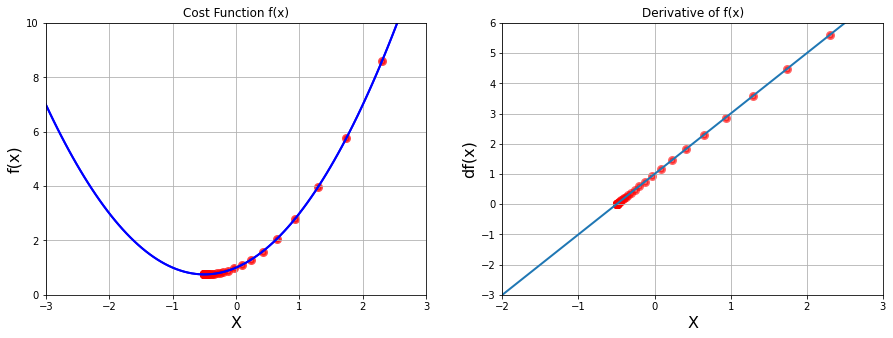

In [9]:
plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
plt.grid()
plt.title('Cost Function f(x)')
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.xlim([-3, 3])
plt.ylim([0, 10])
plt.plot(X, f(X), color='blue', linewidth=2)
values = [f(n) for n in x_list]
plt.plot(X, f(X), color='blue', linewidth=2)
plt.scatter(x_list, values, color='red', linewidths=3, alpha=0.7)

plt.subplot(1, 2, 2)
plt.grid()
plt.title('Derivative of f(x)')
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.xlim([-2, 3])
plt.ylim([-3, 6])
plt.plot(X, df(X), linewidth=2)
plt.scatter(x_list, slope_list, color='red', linewidths=3, alpha=0.6)
plt.show()

## Multiple minima vs Initial Guess and Advanced Function
## $$ g(x) = x^4 - 4x^2 + 5 $$

In [10]:
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 4*(x**2) + 5

def dg(x):
    return 4*(x**3) - 8*x

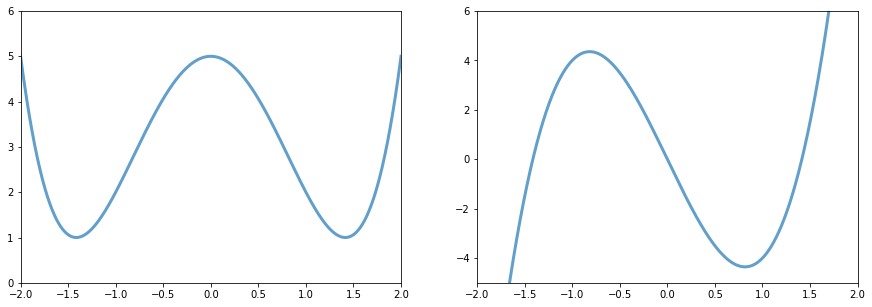

In [11]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.xlim([-2, 2])
plt.ylim([0, 6])
plt.plot(x_2, g(x_2), linewidth=3, alpha=0.7)

plt.subplot(1,2,2)
plt.xlim([-2, 2])
plt.ylim([-5, 6])
plt.plot(x_2, dg(x_2), linewidth=3, alpha=0.7)

plt.show()

### Gradient Descent Function

In [12]:
def gradient_descent(derivative_func, inital_guess, multiplier=0.02, precision=0.0001, max_iter=10):
    new_x = inital_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier*gradient
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        step_size = abs(new_x - previous_x)
        if step_size < precision:
            break
    
    return new_x, x_list, slope_list

In [13]:
# print(local_minima)
# print(len(list_x))

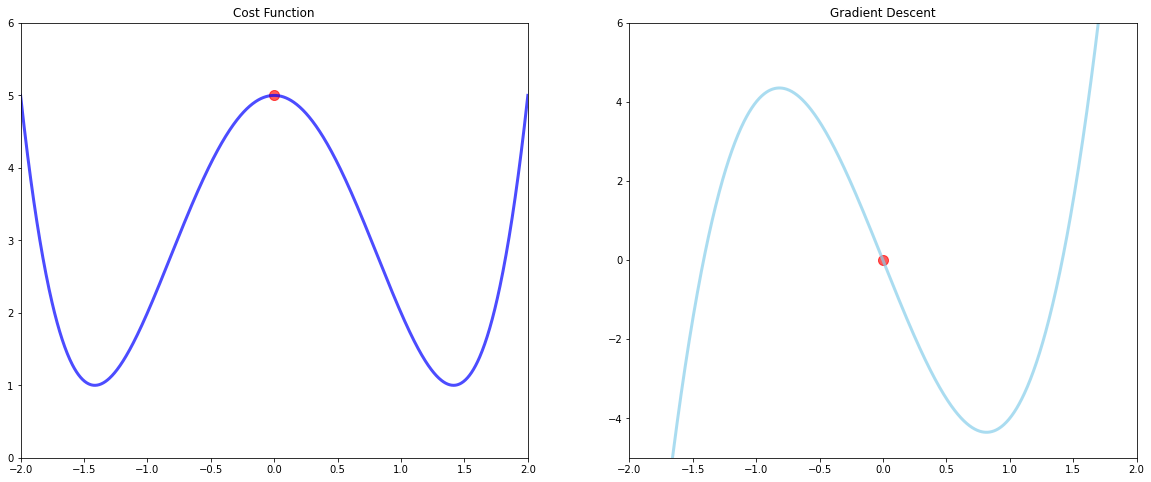

In [14]:
local_minima, list_x, deriv_list = gradient_descent(derivative_func= dg,inital_guess= 0)
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title('Cost Function')
plt.xlim([-2, 2])
plt.ylim([0, 6])
plt.plot(x_2, g(x_2), linewidth=3, alpha=0.7, color='blue')
variable = [g(x) for x in list_x]
plt.scatter(list_x, variable, color='red', alpha=0.4, s=100)

plt.subplot(1,2,2)
plt.title('Gradient Descent')
plt.xlim([-2, 2])
plt.ylim([-5, 6])
plt.plot(x_2, dg(x_2), linewidth=3, alpha=0.7, color='skyblue')
plt.scatter(list_x, deriv_list, color='red', alpha=0.4, s=100)


# plt.subplot(1, 3, 3)
# plt.title('Closure look of gradient descent')
# plt.xlim([1.55, 1])
# plt.ylim([-1,1])
# plt.plot(x_2, dg(x_2), linewidth=3, alpha=0.7)
# plt.scatter(list_x, deriv_list, color='red', alpha=0.7, s=100)

plt.show()

# Example 3 - Divergent - Overflow- Tuples
## $$ h(x) = x^5 - 2x^4 + 2 $$

In [15]:
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

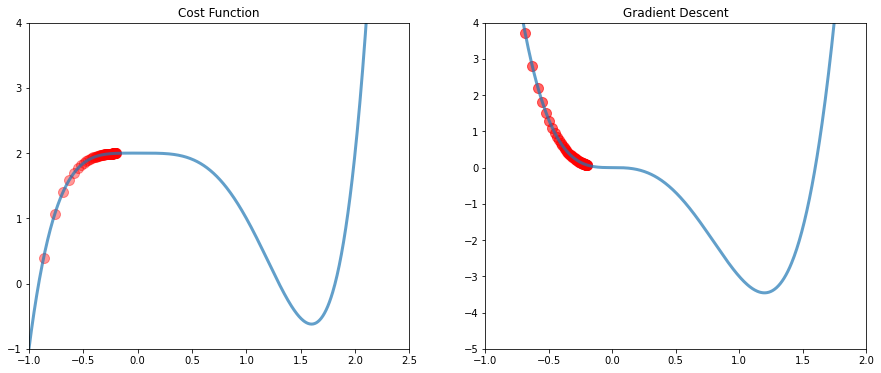

Local minima at:  -1.8398461123332792e+24
Cost at this minima:  -2.1081790694225687e+121
Number steps of took place:  72


In [16]:
local_minima, list_x, deriv_list = gradient_descent(derivative_func= dh,inital_guess= -0.2, max_iter=71)
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title('Cost Function')
plt.xlim([-1, 2.5])
plt.ylim([-1, 4])
plt.plot(x_3, h(x_3), linewidth=3, alpha=0.7)
variable = [h(x) for x in list_x]
plt.scatter(list_x, variable, color='red', alpha=0.4, s=100)

plt.subplot(1,2,2)
plt.title('Gradient Descent')
plt.xlim([-1, 2])
plt.ylim([-5, 4])
plt.plot(x_3, dh(x_3), linewidth=3, alpha=0.7)
plt.scatter(list_x, deriv_list, s = 100, color='red', alpha=0.6)
plt.show()

print('Local minima at: ', local_minima)
print('Cost at this minima: ', h(local_minima))
print('Number steps of took place: ', len(list_x))

## Learning Rate

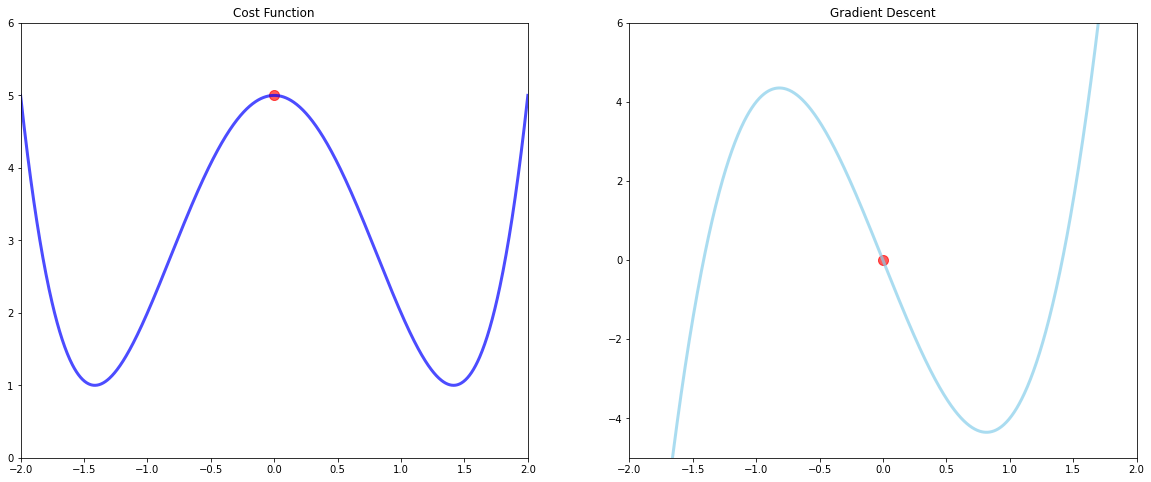

In [17]:
local_minima, list_x, deriv_list = gradient_descent(derivative_func= dg,inital_guess= 0)
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title('Cost Function')
plt.xlim([-2, 2])
plt.ylim([0, 6])
plt.plot(x_2, g(x_2), linewidth=3, alpha=0.7, color='blue')
variable = [g(x) for x in list_x]
plt.scatter(list_x, variable, color='red', alpha=0.4, s=100)

plt.subplot(1,2,2)
plt.title('Gradient Descent')
plt.xlim([-2, 2])
plt.ylim([-5, 6])
plt.plot(x_2, dg(x_2), linewidth=3, alpha=0.7, color='skyblue')
plt.scatter(list_x, deriv_list, color='red', alpha=0.4, s=100)
plt.show()

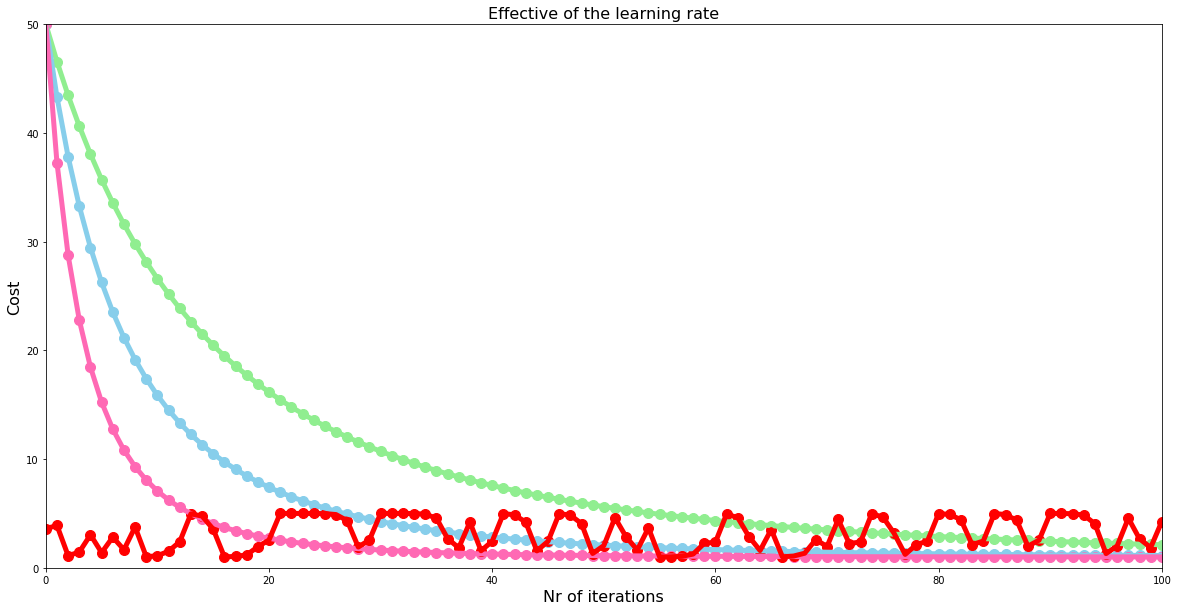

In [18]:
# Run gradient descent 3 time
n = 100
low_gamma = gradient_descent(derivative_func= dg,inital_guess= 3, multiplier=0.0005, precision=0.0001, max_iter=n)
medium_gamma = gradient_descent(derivative_func= dg,inital_guess= 3, multiplier=0.001, precision=0.0001, max_iter=n)
high_gamma = gradient_descent(derivative_func= dg,inital_guess= 3, multiplier=0.002, precision=0.0001, max_iter=n)
insane_gamma = gradient_descent(derivative_func= dg,inital_guess= 1.9, multiplier=0.2, precision=0.0001, max_iter=n)

# Plotting reduction is cost for each iteration
plt.figure(figsize = (20,10))

plt.xlim([0, n])
plt.ylim([0, 50])

plt.title('Effective of the learning rate', fontsize=16)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our chart
# 1) Y values: convert the list to numpy array
low_values = np.array(low_gamma[1])
medium_values = np.array(medium_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])

# 2) X values: Create a list form 0 to n+1
iteration_list = list(range(0, n+1))

plt.plot(iteration_list, g(low_values), linewidth=5, color='lightgreen')
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=100)

plt.plot(iteration_list, g(medium_values), linewidth=5, color='skyblue')
plt.scatter(iteration_list, g(medium_values), color='skyblue', s=100)

plt.plot(iteration_list, g(high_values), linewidth=5, color='hotpink')
plt.scatter(iteration_list, g(high_values), color='hotpink', s=100)

plt.plot(iteration_list, g(insane_values), linewidth=5, color='red')
plt.scatter(iteration_list, g(insane_values), color='red', s=100)
plt.show()

## Gradient Descent
### Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function $(f)$ that minimizes a cost function (cost).

### Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.

## Tips for Gradient Descent
This section lists some tips and tricks for getting the most out of the gradient descent algorithm for machine learning.

#### Plot Cost versus Time: Collect and plot the cost values calculated by the algorithm each iteration. The expectation for a well performing gradient descent run is a decrease in cost each iteration. If it does not decrease, try reducing your learning rate.

#### Learning Rate: The learning rate value is a small real value such as 0.1, 0.001 or 0.0001. Try different values for your problem and see which works best.

#### Rescale Inputs: The algorithm will reach the minimum cost faster if the shape of the cost function is not skewed and distorted. You can achieved this by rescaling all of the input variables (X) to the same range, such as $[0, 1]$ or $[-1, 1]$.

#### Few Passes: Stochastic gradient descent often does not need more than 1-to-10 passes through the training dataset to converge on good or good enough coefficients.

#### Plot Mean Cost: The updates for each training dataset instance can result in a noisy plot of cost over time when using stochastic gradient descent. Taking the average over 10, 100, or 1000 updates can give you a better idea of the learning trend for the algorithm.

## Example 4 - Data woth 3D Chart
## Minimize $$ f(x,y) = \frac{1}{3^{-x^2 -y^2}+1} $$

In [19]:
def f(x, y):
    r = 3**(-x**2 -y**2)
    return 1/(r+1)

In [20]:
# Make our x and y data

x_4 = np.linspace(-2, 2, num=200)
y_4 = np.linspace(-2, 2, num=200)
print('Shape of X', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Shape after meshgrid', x_4.shape)


Shape of X (200,)
Shape after meshgrid (200, 200)


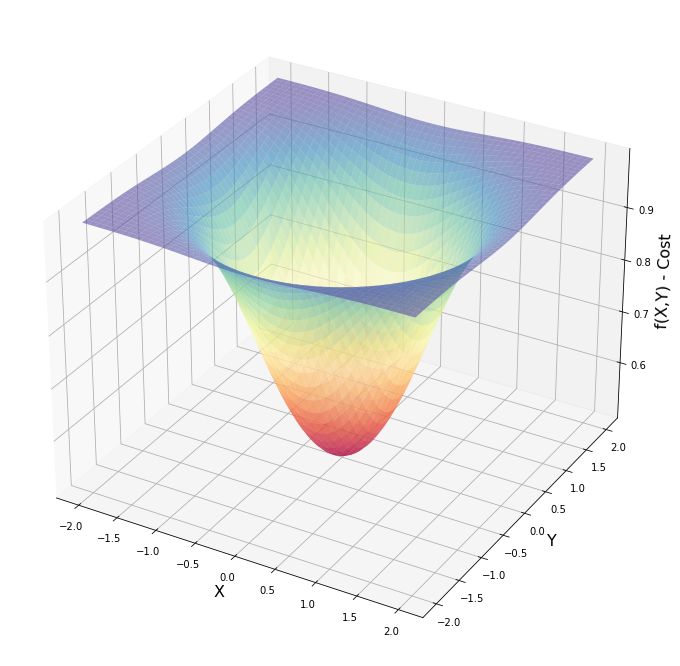

In [21]:
# Generating 3D plot

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)
ax.set_zlabel('f(X,Y) - Cost', fontsize=16)
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.Spectral, alpha=0.6)
plt.show()

## Partial Derivative and Symbolic Computation

## $$ \frac{\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2 - y^2}}{ \left( 3^{-x^2 - y^2}+1 \right )^2} $$
## $$ \frac{\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2 - y^2}}{ \left( 3^{-x^2 - y^2}+1 \right )^2} $$

In [22]:
def dfx(x, y):
    return 2*3**(-x**2 - y**2)*x*math.log(3)/(3**(-x**2 - y**2) + 1)**2

def dfy(x, y):
    return 2*3**(-x**2 - y**2)*y*math.log(3)/(3**(-x**2 - y**2) + 1)**2

In [23]:
# Sympy treats a as x and b as y in function
# Solving using SymPy but it is slower
a, b = sp.symbols('x, y')
print('Our cost function is:',f(a,b))
print('Partial derivative of f(x,y) wrt x is:',sp.diff(f(a,b), a))
print('Value of f(x,y) at x=1.8 y=1.0 is:', f(a,b).evalf(subs={a:1.8, b:1.0}))
print('Value of Partial Derivative of f(x,y) wrt x at x=1.8 y=1.0 is:', sp.diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative of f(x,y) wrt x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is: 0.990604794032582
Value of Partial Derivative of f(x,y) wrt x at x=1.8 y=1.0 is: 0.0368089716197505


In [24]:
# Solving using own made derivative function
print('Our cost function is:', f(a, b))
print('Paritial derivative of f(x, y) wrt x is:', dfx(a, b))
print('Paritial derivative of f(x, y) wrt y is:', dfy(a, b))
print('Value of f(x, y) at x=1.8 y=1.0 is:', f(1.8, 1.0))
print('Value of Partial Derivative of f(x, y) wrt x at x=1.8 y=1.0 is:', dfx(1.8, 1.0))
print('Value of Partial Derivative of f(x, y) wrt y at x=1.8 y=1.0 is:', dfy(1.8, 1.0))

Our cost function is: 1/(3**(-x**2 - y**2) + 1)
Paritial derivative of f(x, y) wrt x is: 2.19722457733622*3**(-x**2 - y**2)*x/(3**(-x**2 - y**2) + 1)**2
Paritial derivative of f(x, y) wrt y is: 2.19722457733622*3**(-x**2 - y**2)*y/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8 y=1.0 is: 0.9906047940325824
Value of Partial Derivative of f(x, y) wrt x at x=1.8 y=1.0 is: 0.036808971619750504
Value of Partial Derivative of f(x, y) wrt y at x=1.8 y=1.0 is: 0.020449428677639166


## Batch Gradient Descent

In [25]:
#Setup
multiplier = 0.1
params = np.array([1.8, 1.0])
max_iter = 200

for n in range(max_iter):
    # gradient_x = sp.diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    # gradient_y = sp.diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradient_x = dfx(params[0], params[1])
    gradient_y = dfy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients

print('Values of gradient array:', gradients)
print('Minimum value occurs at x:', params[0])
print('Minimum value occurs at y:', params[1])
print('The cost is:', f(params[0], params[1]))

Values of gradient array: [0.00046144 0.00025636]
Minimum value occurs at x: 0.0007938985101347202
Minimum value occurs at y: 0.0004410547278526219
The cost is: 0.5000002265349848


In [55]:
# Advanced NumPy array practice:

kirk = np.array([['captain', 'Guitar']])
# print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Queslove', 'Drum']])
# print(hs_band.shape)

the_roots = np.append(arr=hs_band, values=kirk.reshape(1,2), axis=0)
# print(the_roots[:,0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print(the_roots[:,0])

['Black Thought' 'Queslove' 'captain' 'Malik B']


## Graphing 3D Gradient and Numpy Adv Array

In [64]:
#Setup
multiplier = 0.1
params = np.array([1.8, 1.0])
max_iter = 200
values_array = params.reshape(1, 2)

for n in range(max_iter):
    # gradient_x = sp.diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    # gradient_y = sp.diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradient_x = dfx(params[0], params[1])
    gradient_y = dfy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    # values_array = np.append(arr=values_array, values=params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis = 0)

print(n)
print('Values of gradient array:', gradients)
print('Minimum value occurs at x:', params[0])
print('Minimum value occurs at y:', params[1])
print('The cost is:', f(params[0], params[1]))

199
Values of gradient array: [0.00046144 0.00025636]
Minimum value occurs at x: 0.0007938985101347202
Minimum value occurs at y: 0.0004410547278526219
The cost is: 0.5000002265349848


In [58]:
print(values_array.shape)

(201, 2)


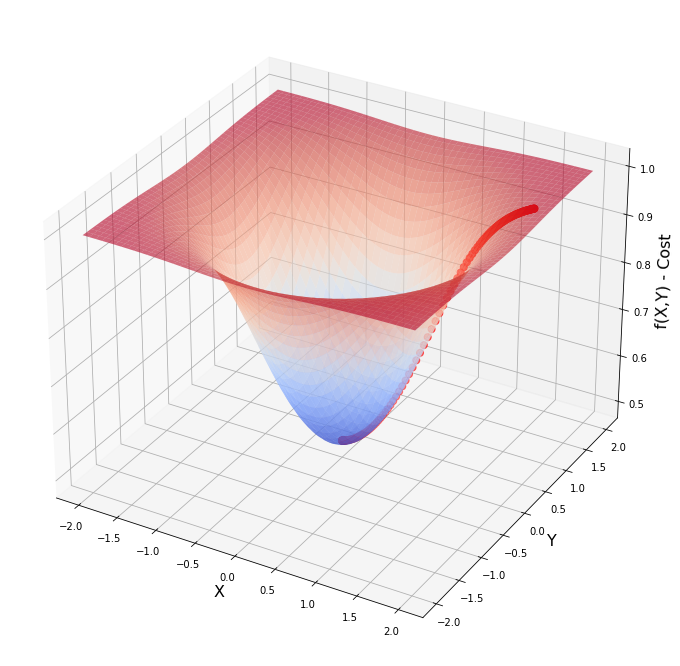

In [71]:
# Generating 3D plot

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)
ax.set_zlabel('f(X,Y) - Cost', fontsize=16)
ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.6)
ax.scatter(values_array[:,0], values_array[0:,1], 
f(values_array[:,0], values_array[:,1]), s=50, color='red')
plt.show()